In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter

In [22]:
games = pd.read_parquet("games.parquet")
items = pd.read_parquet("items.parquet")
reviews = pd.read_parquet("reviews.parquet")


GAMES

In [5]:
games.describe(include="all")

,app_name,price,item_id,developer,año_lanzamiento,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
count,32133,32133.00000,32133,32133,32133.00000,32133.000000,32133.000000,32133.000000,32133.000000,32133.000000,...,32133.000000,32133.000000,32133.000000,32133.000000,32133.000000,32133.000000,32133.000000,32133.000000,32133.000000,32133.000000
unique,32095,NaN,32132,10993,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Soundtrack,NaN,612880,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,2,3298,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.48619,NaN,NaN,1878.99860,0.000218,0.352286,0.256496,0.005695,0.002894,...,0.002396,0.170510,0.033704,0.208477,0.003268,0.039119,0.216506,0.010581,0.003610,0.008340
std,NaN,15.66249,NaN,NaN,505.63735,0.014758,0.477690,0.436706,0.075252,0.053721,...,0.048894,0.376086,0.180468,0.406226,0.057071,0.193880,0.411870,0.102320,0.059976,0.090945
min,NaN,0.00000,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.99000,NaN,NaN,2014.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,4.99000,NaN,NaN,2016.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,9.99000,NaN,NaN,2017.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
items.describe(include="all")

,user_id,items_count,steam_id,item_id,item_name,playtime_forever,playtime_2weeks
count,5153209,5.153209e+06,5153209,5153209,5153209,5.153209e+06,5.153209e+06
unique,70912,NaN,70912,10978,10947,NaN,NaN
top,phrostb,NaN,76561198102767019,205790,Dota 2 Test,NaN,NaN
freq,7762,NaN,7762,49571,49571,NaN,NaN
mean,NaN,3.147229e+02,NaN,NaN,NaN,9.914951e+02,9.104707e+00
std,NaN,6.933596e+02,NaN,NaN,NaN,5.418204e+03,1.403926e+02
min,NaN,1.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,7.200000e+01,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,NaN,1.380000e+02,NaN,NaN,NaN,3.400000e+01,0.000000e+00
75%,NaN,2.760000e+02,NaN,NaN,NaN,3.550000e+02,0.000000e+00


In [7]:
reviews.describe(include="all")

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
count,59305,59305,59305,59305,59305,59305,59305,59305,59305
unique,25458,25458,186,1906,1015,3682,1344,2,55313
top,76561198094665607,http://steamcommunity.com/profiles/76561198094...,,"Posted June 21, 2014.",,730,No ratings yet,True,good game
freq,20,20,51154,225,53165,3759,30168,52473,100


In [8]:
#Calcular el primer y tercer cuartil de price
Q1 = games['price'].quantile(0.25)
Q3 = games['price'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Precio x Año de lanzamiento

    se intenta ver como fue creciendo el mercado

In [ ]:
"""sns.boxplot(x='año_lanzamiento',y="price",data=games)
plt.show()"""

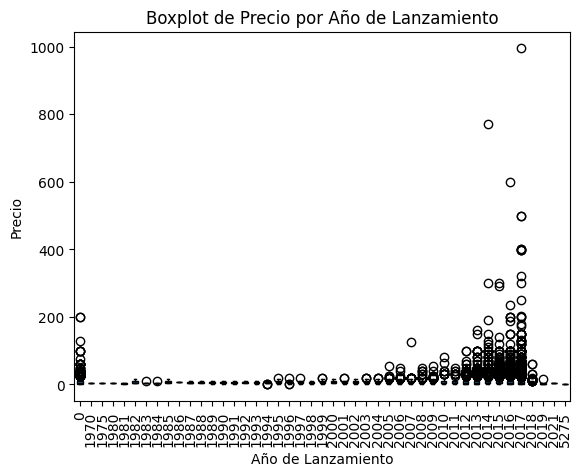

In [9]:
games.sort_values(by="año_lanzamiento", inplace=True)

plt.boxplot(
    [games[games["año_lanzamiento"] == año]["price"] for año in games["año_lanzamiento"].unique()],
    labels=games["año_lanzamiento"].unique(),
    vert=True,  # Vertical (True) u horizontal (False)
    patch_artist=True,  # Rellenar las cajas con color
    medianprops={'color': 'black'}  # Color de la línea de la mediana
)

plt.xticks(rotation=90)

# Añadir etiquetas y título
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Precio")
plt.title("Boxplot de Precio por Año de Lanzamiento")

# Mostrar el gráfico
plt.show()

In [10]:
#Para remover los outliers
games_price=games[(games['price'] > 0) & (games['price'] < 50)]
games_price


,app_name,price,item_id,developer,año_lanzamiento,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
32132,Maze Run VR,4.99,681550,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20011,Merry Snowballs,5.99,567730,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14631,Bits n Bullets,3.99,730180,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14640,SONAR - A Virtual Reality Experience,0.99,738790,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19981,OneManVurgeR,6.99,555170,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11870,Island Build Masters,6.99,709280,"Evgeniy Psarev,Alexey Irhin,Dmitry Ryabchunov",2018,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
12941,Fresh Body: Original Soundtrack,1.99,772400,LOVIGAME,2018,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
0,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
14431,The Legendary Player - Make Your Reputation - ...,14.99,699570,Ninetales Studios,2019,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0


C:\Users\nahue\AppData\Local\Temp\ipykernel_3976\1272482362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_price.sort_values(by="año_lanzamiento", inplace=True)


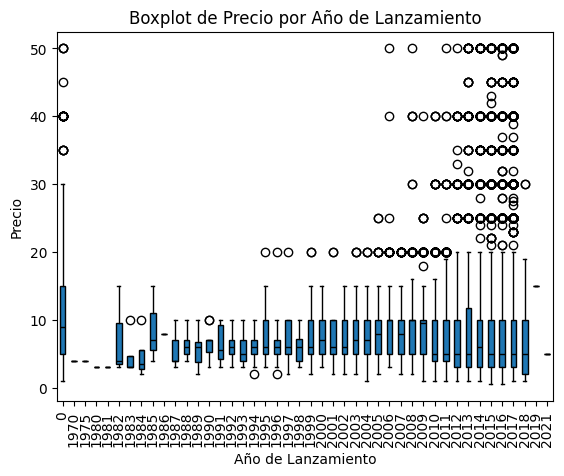

In [11]:
games_price.sort_values(by="año_lanzamiento", inplace=True)

plt.boxplot(
    [games_price[games_price["año_lanzamiento"] == año]["price"] for año in games_price["año_lanzamiento"].unique()],
    labels=games_price["año_lanzamiento"].unique(),
    vert=True,  # Vertical (True) u horizontal (False)
    patch_artist=True,  # Rellenar las cajas con color
    medianprops={'color': 'black'}  # Color de la línea de la mediana
)

plt.xticks(rotation=90)

# Añadir etiquetas y título
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Precio")
plt.title("Boxplot de Precio por Año de Lanzamiento")

# Mostrar el gráfico
plt.show()

Se puede ver que hay muchos outliers, razonando podria ver juegos que son caros, pero hay muchos precios que son imposibles...

Los juegos mas jugados

In [12]:
top_juegos_jugados = items.sort_values(by='playtime_forever', ascending=False).head(10)

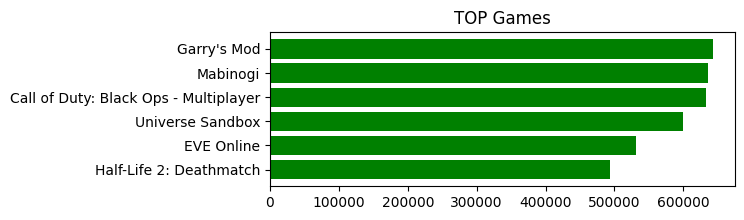

In [13]:
plt.figure(figsize=(6, 2))

plt.barh(top_juegos_jugados['item_name'], top_juegos_jugados['playtime_forever'], color='Green')
plt.title('TOP Games') 

plt.gca().invert_yaxis()  # Invertir el eje Y para que el juego con más tiempo jugado esté en la parte superior.

plt.show()

In [14]:
# Convierte las columnas a tipo int32
genres_list = ['Accounting','Action', 'Adventure', 'Animation &amp; Modeling','Casual','Design &amp; Illustration', 'Early Access','Education','Free to Play', 'Indie', 'Massively Multiplayer','Photo Editing', 'RPG', 'Racing', 'Simulation','Software Training', 'Sports', 'Strategy','Utilities', 'Video Production', 'Web Publishing']
for i in genres_list:
    games[i] = games[i].astype('int32')

In [15]:
# Define una funcion de conteo
def frequency_counter(df, lista):
    aux_list = []
    for i in lista:
        aux_list.append((i, round((len(df.loc[df[i] == 1])), 2)))
    aux_list = dict(aux_list)
    counter_aux_list = Counter(aux_list)
    return counter_aux_list

C:\Users\nahue\AppData\Local\Temp\ipykernel_3976\2686819485.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y=datos.index, data=datos, palette='viridis')


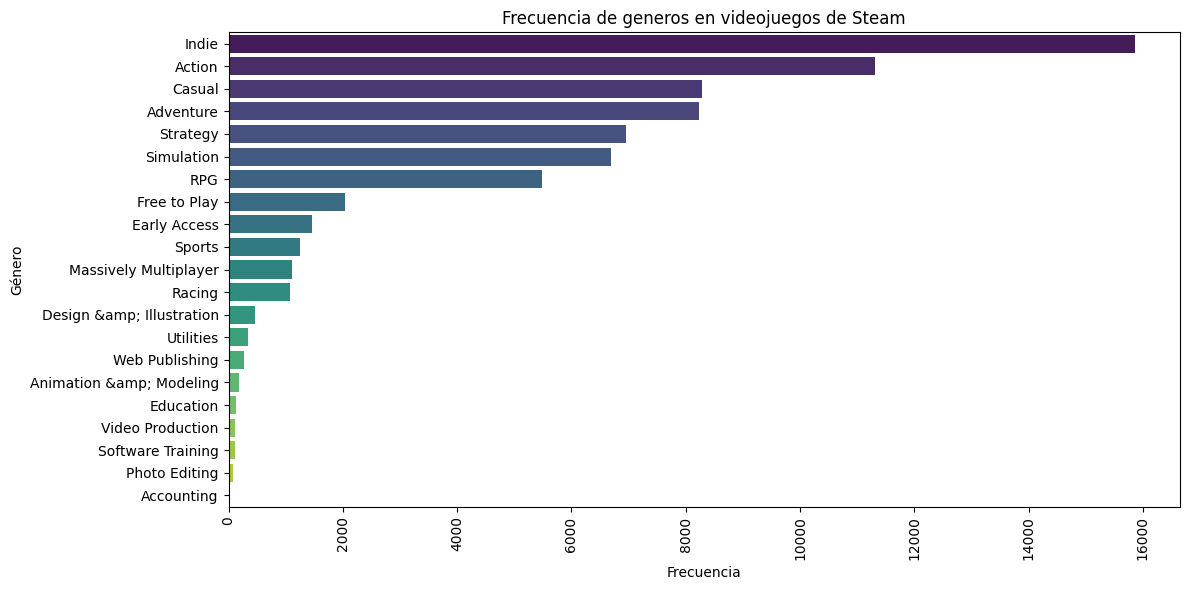

In [16]:
# Crea y ordena el DataFrame por los valores de frecuencia en orden descendente
counter_aux_list_2 = frequency_counter(games, genres_list)
datos = counter_aux_list_2
datos = pd.DataFrame.from_dict(datos, orient='index', columns=['Frecuencia'])
datos = datos.sort_values(by='Frecuencia', ascending=False)
# Crea el gráfico de barras usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Frecuencia', y=datos.index, data=datos, palette='viridis')

# Rota las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)

# Etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Frecuencia de generos en videojuegos de Steam')

# Muestra el gráfico
plt.tight_layout()
plt.show()

Positivo vs negativo en reseñas

In [17]:
# Conviertimos los valores booleanos de recommend a valores numéricos
reviews['recommend'] = reviews['recommend'].astype(int)

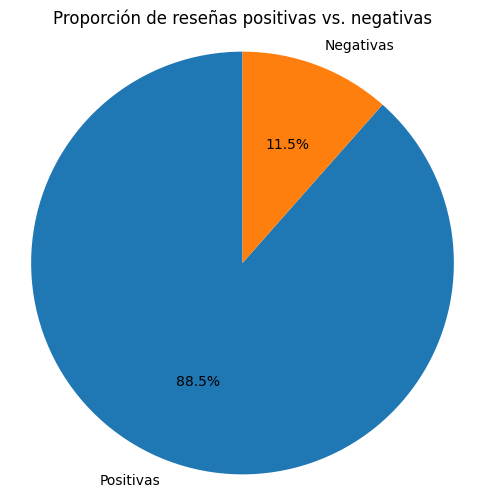

In [18]:
plt.figure(figsize=(6, 6))

# Contar el número de reseñas positivas y negativas
num_positivas = len(reviews[reviews['recommend'] == 1])
num_negativas = len(reviews[reviews['recommend'] == 0])

# Graficar los datos
plt.pie([num_positivas, num_negativas], labels=['Positivas', 'Negativas'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Ajustar el aspecto del gráfico para que sea un círculo.
plt.title('Proporción de reseñas positivas vs. negativas')  # Título del gráfico

# Mostrar el gráfico
plt.show()

Analisis de Sentimiento y su distribucion

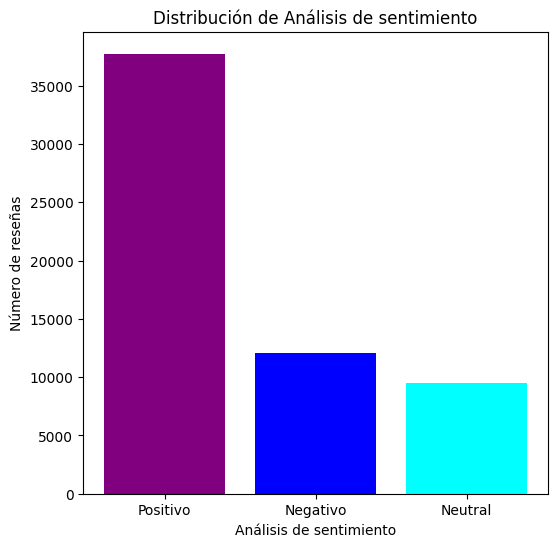

In [23]:
plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico.

# Contar el número de reseñas positivas, negativas y neutrales
num_positivas = len(reviews[reviews['sentiment_analysis'] == 2])
num_negativas = len(reviews[reviews['sentiment_analysis'] == 1])
num_neutrales = len(reviews[reviews['sentiment_analysis'] == 0])

# Graficar los datos
plt.bar(['Positivo', 'Negativo', 'Neutral'], [num_positivas, num_negativas, num_neutrales], color=['purple', 'blue', 'cyan'])
plt.xlabel('Análisis de sentimiento')  # Etiqueta del eje X
plt.ylabel('Número de reseñas')  # Etiqueta del eje Y
plt.title('Distribución de Análisis de sentimiento')  # Título del gráfico

# Mostrar el gráfico
plt.show()

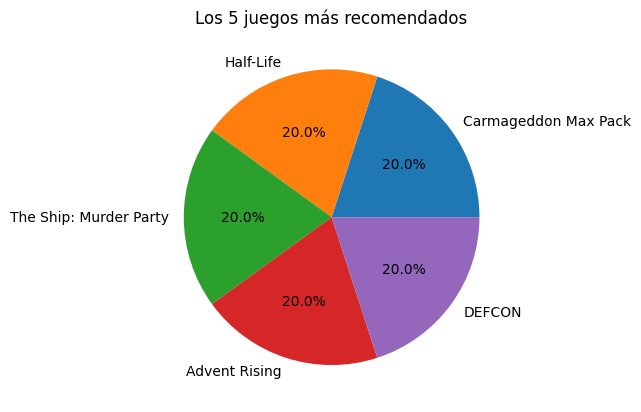

In [24]:
merged_df = pd.merge(games, reviews, on='item_id')
# Seleccionar los 5 juegos más recomendados y eliminar los duplicados
top_recomendados = merged_df.drop_duplicates(subset='app_name').nlargest(5, 'recommend')

# Crear un gráfico de torta  que muestra el nombre del juego y la cantidad de recomendaciones
plt.pie(top_recomendados['recommend'], labels=top_recomendados['app_name'], autopct='%1.1f%%')
plt.title('Los 5 juegos más recomendados')
plt.show()